First, we load the dataset and perform some initial exploration to understand its structure and content.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("twitter_training.csv", header=None)

# Rename columns
df.columns = ["id", "entity", "sentiment", "text"]

# Basic info
print(df.shape)

print(df["sentiment"].value_counts())

(74682, 4)
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


Let's look at the first few rows of the dataframe to get a sense of the data.

In [ ]:
print(df.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


We define and apply a function to clean the text data. This function handles lowercasing, removes URLs, mentions, hashtags, and punctuation, and keeps only letters and spaces.

In [ ]:
import re, string

def clean_text(text):
    text = text.lower()                                    # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)             # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)                  # remove mentions/hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)                # keep only letters
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    return text.strip()

# Apply cleaning
df["clean_text"] = df["text"].astype(str).apply(clean_text)

print(df[["text", "clean_text"]].head(10))


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  So I spent a few hours making something for fu...   
7  So I spent a couple of hours doing something f...   
8  So I spent a few hours doing something for fun...   
9  So I spent a few hours making something for fu...   

                                          clean_text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands  and i will murder y...  
5  im getting into borderlands and i can murder y... 

We split the data into training and testing sets and then use TF-IDF vectorization to convert the text data into numerical features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["sentiment"],
    test_size=0.2, random_state=42, stratify=df["sentiment"]
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


Train shape: (59745, 5000)
Test shape: (14937, 5000)


We train a Multinomial Naive Bayes model and evaluate its performance.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.636138448148892

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.75      0.35      0.48      2598
    Negative       0.62      0.80      0.70      4509
     Neutral       0.64      0.53      0.58      3664
    Positive       0.62      0.73      0.67      4166

    accuracy                           0.64     14937
   macro avg       0.66      0.60      0.61     14937
weighted avg       0.65      0.64      0.62     14937


Confusion Matrix:
 [[ 915  712  294  677]
 [  74 3612  377  446]
 [ 143  841 1944  736]
 [  89  645  401 3031]]


 train a Logistic Regression model and evaluate its performance.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=10000, n_jobs=-1)
log_reg.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_tfidf)

# Evaluation
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))



Accuracy (Logistic Regression): 0.6769096873535516

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.69      0.50      0.58      2598
    Negative       0.68      0.79      0.73      4509
     Neutral       0.65      0.62      0.63      3664
    Positive       0.69      0.72      0.70      4166

    accuracy                           0.68     14937
   macro avg       0.68      0.66      0.66     14937
weighted avg       0.68      0.68      0.67     14937



 visualize the confusion matrix for the Logistic Regression model.


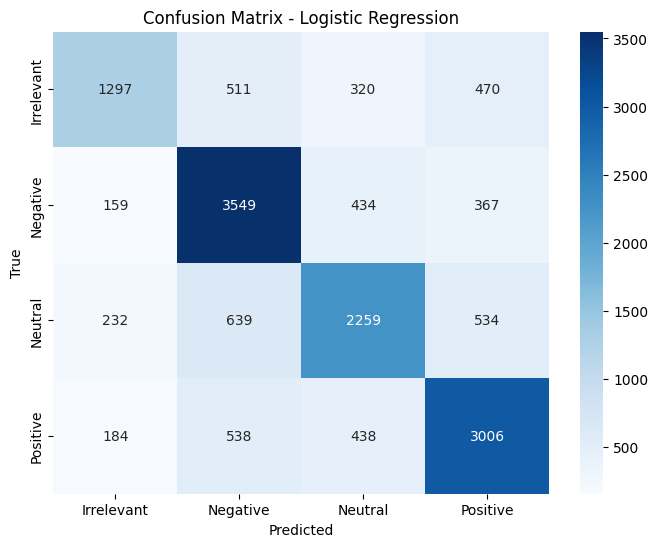

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr, labels=log_reg.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()




check the distribution of predictions for the Logistic Regression model.


In [ ]:
import pandas as pd

pred_dist = pd.Series(y_pred_lr).value_counts()
print("Prediction distribution:\n", pred_dist)



Prediction distribution:
 Negative      5237
Positive      4377
Neutral       3451
Irrelevant    1872
Name: count, dtype: int64



improve accuacruy using SVM

Install necessary libraries

In [ ]:
!pip install emoji contractions

Now that the necessary libraries are installed, I can proceed with the updated text cleaning function that includes handling contractions and emojis, and then we can explore using SVM for improved accuracy.

In [ ]:
import re, emoji, contractions
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = contractions.fix(text)                  # expand contractions
    text = emoji.demojize(text)                    # 🙂 -> ":slightly_smiling_face:"
    text = re.sub(r"http\S+|www\S+", "", text)     # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)          # remove mentions & hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # remove special chars & numbers
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text.strip()

# Apply cleaning
df["clean_text"] = df["text"].astype(str).apply(clean_text)

print(df[["text", "clean_text"]].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  So I spent a few hours making something for fu...   
7  So I spent a couple of hours doing something f...   
8  So I spent a few hours doing something for fun...   
9  So I spent a few hours making something for fu...   

                                          clean_text  
0                         getting borderlands murder  
1                                coming borders kill  
2                           getting borderlands kill  
3                          coming borderlands murder  
4                         getting borderlands murder  
5                         getting borderlands murder 

Now that the necessary libraries are installed, I can proceed with the updated text cleaning function that includes handling contractions and emojis, and then we can explore using SVM for improved accuracy.

In [ ]:
import re, emoji, contractions
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = contractions.fix(text)                  # expand contractions
    text = emoji.demojize(text)                    # 🙂 -> ":slightly_smiling_face:"
    text = re.sub(r"http\S+|www\S+", "", text)     # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)          # remove mentions & hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # remove special chars & numbers
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text.strip()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We apply the improved cleaning function to the text data.



In [ ]:
df["clean_text"] = df["text"].astype(str).apply(clean_text)

 define an improved text cleaning function that includes handling contractions, emojis, and stopwords.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1,2))
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]


Split the data and train a Linear SVC model (SVM) for sentiment classification and evaluate its performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7744527013456517
              precision    recall  f1-score   support

  Irrelevant       0.79      0.66      0.72      2598
    Negative       0.77      0.85      0.81      4509
     Neutral       0.77      0.73      0.75      3664
    Positive       0.78      0.80      0.79      4166

    accuracy                           0.77     14937
   macro avg       0.78      0.76      0.77     14937
weighted avg       0.78      0.77      0.77     14937



Perform a grid search to find the best hyperparameter for the Linear SVC model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best C: {'C': 10}
Best accuracy: 0.7523976901832788


Re-apply the improved text cleaning function to ensure it's using the correct NLTK data.

In [ ]:
import re, emoji, contractions
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = contractions.fix(text)                  # expand contractions: can't -> cannot
    text = emoji.demojize(text)                    # 🙂 -> ":slightly_smiling_face:"
    text = re.sub(r"http\S+|www\S+", "", text)     # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)          # remove mentions & hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # keep only letters
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text.strip()

# Apply to your dataset
df["clean_text"] = df["text"].apply(clean_text)

print(df[["text", "clean_text"]].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  So I spent a few hours making something for fu...   
7  So I spent a couple of hours doing something f...   
8  So I spent a few hours doing something for fun...   
9  So I spent a few hours making something for fu...   

                                          clean_text  
0                         getting borderlands murder  
1                                coming borders kill  
2                           getting borderlands kill  
3                          coming borderlands murder  
4                         getting borderlands murder  
5                         getting borderlands murder 

use TF-IDF vectorization with unigrams and bigrams and a higher max_features for potentially better performance.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF with unigrams + bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)

X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]

print("TF-IDF shape:", X.shape)



TF-IDF shape: (74682, 20000)


Train a Logistic Regression model with updated parameters and evaluate its performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression with stronger regularization
model = LogisticRegression(max_iter=400, C=2.0, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.8087969471781482
              precision    recall  f1-score   support

  Irrelevant       0.77      0.79      0.78      2598
    Negative       0.87      0.82      0.85      4509
     Neutral       0.73      0.81      0.77      3664
    Positive       0.84      0.80      0.82      4166

    accuracy                           0.81     14937
   macro avg       0.81      0.81      0.81     14937
weighted avg       0.81      0.81      0.81     14937



SVM


Train a Linear SVC model (SVM) and evaluate its performance.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Instantiate and train the model
model = LinearSVC()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8422039231438709

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.86      0.76      0.81      2598
    Negative       0.83      0.90      0.86      4509
     Neutral       0.83      0.82      0.83      3664
    Positive       0.85      0.85      0.85      4166

    accuracy                           0.84     14937
   macro avg       0.84      0.83      0.84     14937
weighted avg       0.84      0.84      0.84     14937





Visualize the confusion matrix for the SVM model.



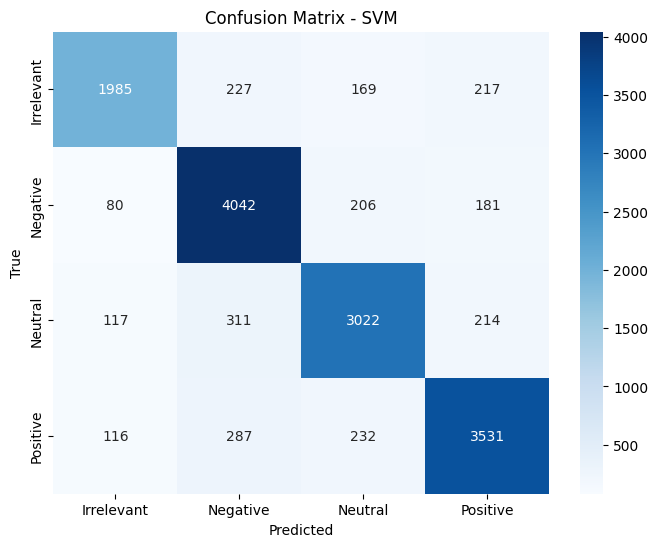

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.show()

Compare the accuracy of the Logistic Regression and SVM models using a bar chart.

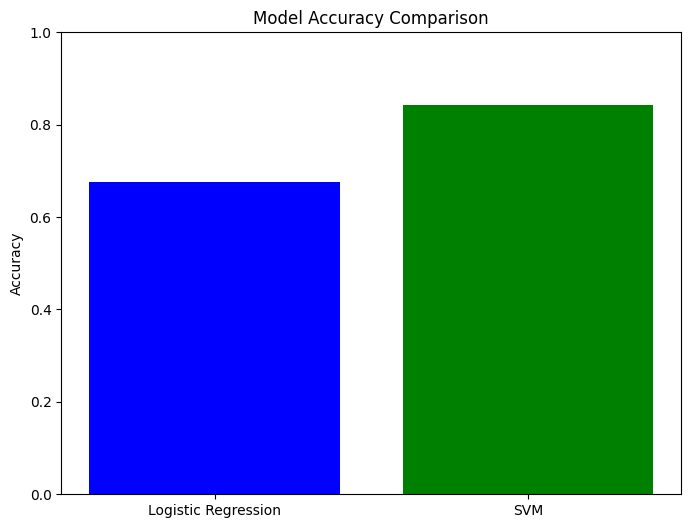

In [ ]:
import matplotlib.pyplot as plt

# Store model accuracies
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred)
}

# Create bar chart
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=["blue", "green"])
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

Notebook focuses on performing sentiment analysis on a Twitter dataset to classify tweets into one of four sentiment categories: Negative, Positive, Neutral, and Irrelevant. The process involved:

1.  **Data Loading and Exploration:** Loading the dataset and examining its basic structure and the distribution of sentiment labels.
2.  **Text Preprocessing:** Implementing a comprehensive text cleaning pipeline that includes handling contractions and emojis, removing noise like URLs and mentions, and removing common English stopwords to prepare the text data for model training.
3.  **Feature Extraction:** Converting the cleaned text data into numerical features using TF-IDF vectorization, considering both unigrams and bigrams to capture more context.
4.  **Model Training and Evaluation:** Training two different machine learning models, Logistic Regression and Linear Support Vector Machine (SVM), on the processed data. The models were evaluated using standard metrics like accuracy and classification reports.
5.  **Performance Comparison:** Visualizing the performance of the models using confusion matrices and a bar chart comparing their overall accuracy.

The results showed that the Linear SVM model achieved a higher accuracy (approximately 84.2%) compared to the Logistic Regression model (approximately 80.9%) on this dataset, indicating its better performance in classifying the sentiment of the tweets.